In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [2]:
train_path = 'D:/vggH5/train'
valid_path = 'D:/vggH5/valid'
test_path =  'D:/vggH5/test'

In [4]:

train_batch = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['dog', 'cat'], batch_size=10)
test_batch = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['dog', 'cat'], batch_size=10)
valid_batch = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['dog', 'cat'], batch_size=4)

Found 278 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\Users\robot\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


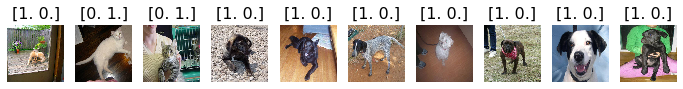

In [6]:
imgs, labels = next(train_batch)
plots(imgs, titles=labels)

In [7]:
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2, activation='softmax')
])
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_batch, steps_per_epoch=4, validation_data=valid_batch, validation_steps=4, epochs=5, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
4/4 - 1s - loss: 314.4807 - accuracy: 0.5000 - val_loss: 183.3865 - val_accuracy: 0.5000
Epoch 2/5
4/4 - 1s - loss: 198.9110 - accuracy: 0.4750 - val_loss: 234.8427 - val_accuracy: 0.4375
Epoch 3/5
4/4 - 1s - loss: 136.1835 - accuracy: 0.5500 - val_loss: 145.2453 - val_accuracy: 0.6250
Epoch 4/5
4/4 - 1s - loss: 114.8347 - accuracy: 0.5250 - val_loss: 168.9106 - val_accuracy: 0.3750
Epoch 5/5
4/4 - 0s - loss: 93.0586 - accuracy: 0.4500 - val_loss: 139.6878 - val_accuracy: 0.5625


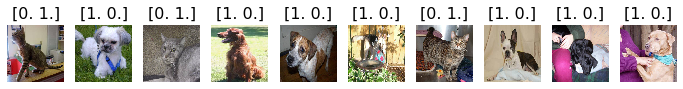

In [8]:
test_imgs, test_labels = next(test_batch)
plots(test_imgs, titles=test_labels)

In [9]:

test_labels = test_labels[:, 0]
test_labels

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [10]:
predictions = model.predict_generator(test_batch, steps=1, verbose=0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [11]:
cm = confusion_matrix(test_labels, predictions[:, 0])

Confusion matrix, without normalization
[[3 0]
 [7 0]]


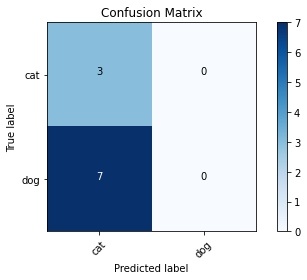

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [13]:
vgg16 = keras.applications.vgg16.VGG16()


In [14]:
model2 = Sequential()
for layer in vgg16.layers[:-1]:
    model2.add(layer)

In [15]:
for layer in model2.layers:
    layer.trainable=False
model2.add(Dense(2, activation='softmax'))

In [16]:
model2.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit_generator(train_batch, steps_per_epoch=4, validation_data=valid_batch, validation_steps=4, epochs=10, verbose=2)

Epoch 1/10
4/4 - 7s - loss: 1.2723 - accuracy: 0.5750 - val_loss: 0.7198 - val_accuracy: 0.6875
Epoch 2/10
4/4 - 6s - loss: 1.0378 - accuracy: 0.6250 - val_loss: 0.9449 - val_accuracy: 0.6250
Epoch 3/10
4/4 - 7s - loss: 0.7675 - accuracy: 0.7000 - val_loss: 0.7942 - val_accuracy: 0.6875
Epoch 4/10
4/4 - 7s - loss: 0.7692 - accuracy: 0.7250 - val_loss: 0.9048 - val_accuracy: 0.5000
Epoch 5/10
4/4 - 7s - loss: 0.5200 - accuracy: 0.7750 - val_loss: 0.7573 - val_accuracy: 0.6250
Epoch 6/10
4/4 - 7s - loss: 0.5197 - accuracy: 0.7750 - val_loss: 0.5106 - val_accuracy: 0.6875
Epoch 7/10
4/4 - 7s - loss: 0.6447 - accuracy: 0.7632 - val_loss: 0.3204 - val_accuracy: 0.8750
Epoch 8/10
4/4 - 7s - loss: 0.4242 - accuracy: 0.8750 - val_loss: 0.5193 - val_accuracy: 0.7500
Epoch 9/10
4/4 - 6s - loss: 0.4454 - accuracy: 0.8000 - val_loss: 0.2450 - val_accuracy: 0.8750
Epoch 10/10
4/4 - 6s - loss: 0.3693 - accuracy: 0.8000 - val_loss: 0.1999 - val_accuracy: 0.8750


C:\Users\robot\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


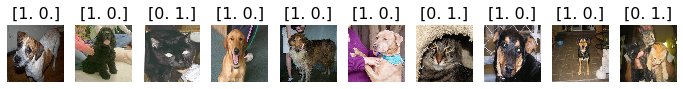

In [17]:
test_imgs, test_labels = next(test_batch)
plots(test_imgs, titles=test_labels)

In [18]:
test_labels = test_labels[:, 0]
test_labels

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0.], dtype=float32)

In [19]:
predictions = model2.predict_generator(test_batch, steps=1, verbose=0).round()

Confusion matrix, without normalization
[[3 0]
 [2 5]]


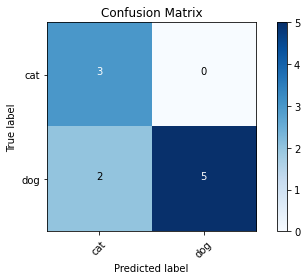

In [20]:
cm = confusion_matrix(test_labels, predictions[:, 0])
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

Confusion matrix, without normalization
[[3 0]
 [2 5]]


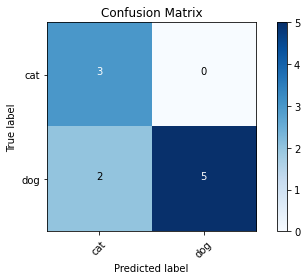

In [22]:
cm = confusion_matrix(test_labels, predictions[:, 0])
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [24]:
model2.save('D:/vggH5/VGG16_CatsNDogs.h5')